In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set(style="whitegrid")
sns.set_context("notebook")

In [3]:
def treatment(df):
	df=df.rename(columns={
		"Shimmer_86CF_Timestamp_Unix_CAL":"timestamp", 
        "Shimmer_86CF_GSR_Range_CAL":"range", 
        "Shimmer_86CF_GSR_Skin_Conductance_CAL":"conductance", 
        "Shimmer_86CF_GSR_Skin_Resistance_CAL":"resistance",
		})
	return df

In [4]:
gsr=treatment(pd.read_csv("Teste3_Session1_Shimmer_86CF_Calibrated_SD.csv",sep="	",skiprows=[0, 2])).drop("Unnamed: 4", axis=1)

In [5]:
gsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37944 entries, 0 to 37943
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    37944 non-null  float64
 1   range        37944 non-null  float64
 2   conductance  37944 non-null  float64
 3   resistance   37944 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


In [6]:
gsr=gsr[gsr["timestamp"]>gsr["timestamp"].min()+83000]
gsr_basal=gsr[gsr["timestamp"]<gsr["timestamp"].min()+60000]
gsr_median = np.median(gsr_basal["conductance"])

<AxesSubplot:xlabel='timestamp', ylabel='conductance'>

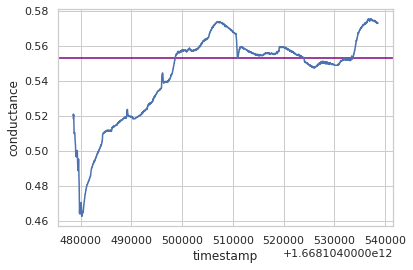

In [7]:
plt.axhline(y=gsr_median, color="purple",linestyle='-')
sns.lineplot(x="timestamp",y="conductance", data=gsr_basal)

In [8]:
gsr_estresse = gsr[gsr["timestamp"]>gsr["timestamp"].min()+60000+165000]
gsr_estresse = gsr_estresse[gsr_estresse["timestamp"]<gsr_estresse["timestamp"].min()+128000]

<AxesSubplot:xlabel='timestamp', ylabel='conductance'>

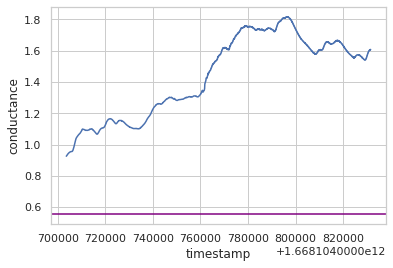

In [9]:
plt.axhline(y=gsr_median, color="purple",linestyle='-')
sns.lineplot(x="timestamp",y="conductance", data=gsr_estresse)

In [10]:
gsr_respiracao = gsr[gsr["timestamp"]>gsr["timestamp"].min()+60000+165000+128000+142000]
gsr_respiracao = gsr_respiracao[gsr_respiracao["timestamp"]<gsr_respiracao["timestamp"].min()+157000]

<AxesSubplot:xlabel='timestamp', ylabel='conductance'>

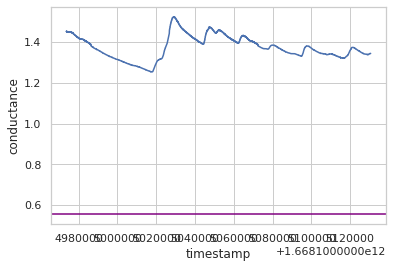

In [11]:
plt.axhline(y=gsr_median, color="purple",linestyle='-')
sns.lineplot(x="timestamp",y="conductance", data=gsr_respiracao)